# Intermediate Data Science

## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours take place in Duke 209 -- [Office Hours Schedule](https://joannabieri.com/schedule.html)
- [Class Website](https://joannabieri.com/data201.html)
- [Syllabus](https://joannabieri.com/data201/IntermediateDataScience.pdf)

## Data and File Formats

Reading in data and making it accessible to your data science techniques is the first step in data science success. This is called data loading or sometimes parsing. As a data scientists you may not have complete control over the format of your data when you first start a project. So it is part of your job to find a way to load it and parse it.

Here are some important data types:

- **CSV (Comma-Separated Values)**

CSV is a simple, text-based format that stores tabular data. Each line in the file represents a data record (a row), and each record consists of one or more fields (columns) separated by commas. The data does not have types and is read in as strings.

- **Text - General**

This is a generalization of CSV types where the data could be just written to lines, or stored as a single string. Once this is read in you would need to do a lot of work to parse it and turn it in to data. It is extremely inefficient, but sometimes this is how the data comes to you.

- **JSON (JavaScript Object Notation)**
  
JSON is a text-based format for representing semi-structured data using key-value pairs, similar to Python dictionaries. It's great for data that has a nested or hierarchical structure. It is human readable but less efficient for storing large flat tables.

- **Apache Parquet**

Parquet is a binary, columnar storage format. Instead of storing data row-by-row like a CSV, it stores all the values for a single column together. This structure is highly optimized for analytical queries. This format can make it really fast to read in subsets of the data and allows for compression of the data. It is not human readable.

- **Pickle**

Pickle is a Python-specific binary format used for serializing and de-serializing Python objects. It can turn almost any Python object (like a list, a dictionary, or even a trained machine learning model) into a stream of bytes that can be saved to a file. It can handle very complex python objects and is extremely easy to use. Can have some compatibility and security issues.

- **HDF5 (Hierarchical Data Format 5)**

HDF5 is a high-performance binary format designed to store and organize massive amounts of data. It acts like a file system within a single file, allowing you to store multiple datasets (e.g., arrays, tables) in a hierarchical structure. It is great for large,complex scientific datasets, but has a steep learning curve.

- **Geospatial Data**

Geospatial data are typically categorized as either vector (representing features with points, lines, and polygons) or raster (representing features as a grid of pixels or cells). There are many formats for these files. One popular one is GeoJSON - which leverages the JSON file format but allows for vector based data. GeoTIFF is standard for raster data.

- **Web APIs (Application Programming Interface) - not a data type but a data access type**

Many websites have public APIs providing data feeds via one of the formats above. If a website has an API , you should use this interface to get data rather than trying to scrape the site.

- **Databases - again not a data type**

In many cases data can be stored in a database: SQL server, MySQL, NoSQL Mongo, or Graph Databases. In these cases you *query* the database to get access to subsets of the data. The choice of database is highly dependent on the project needs and scalability. 


## Pandas Data Loading Functions

Most of this class will focus on using Pandas for our data management. NOTE: if you are a geospatial student there is a sister package called GeoPandas that has very similar functionality to Pandas.

| Function                | Type     | Description                                                                 | Common File Types |
|--------------------------|----------|-----------------------------------------------------------------------------|------------------|
| `pd.read_csv()`          | Text     | Reads comma-separated values into a DataFrame.                              | `.csv` |
| `pd.read_table()`        | Text     | Reads general delimited text files (default delimiter is tab).               | `.txt`, `.tsv` |
| `pd.read_fwf()`          | Text     | Reads fixed-width formatted text files.                                      | `.txt` |
| `pd.read_json()`         | Text     | Reads JSON (JavaScript Object Notation) data.                               | `.json` |
| `pd.read_html()`         | Text     | Parses HTML tables and returns them as a list of DataFrames.                | `.html` |
| `pd.read_xml()`          | Text     | Reads XML data into a DataFrame.                                            | `.xml` |
| `pd.read_sql()`          | Text     | Reads data from a SQL query or database connection.                         | (SQL database) |
| `pd.read_excel()`        | Binary   | Reads Excel spreadsheets (both `.xls` and `.xlsx`).                         | `.xls`, `.xlsx` |
| `pd.read_pickle()`       | Binary   | Reads a Python object saved with `pickle`.                                  | `.pkl` |
| `pd.read_parquet()`      | Binary   | Reads Apache Parquet columnar storage files.                                | `.parquet` |
| `pd.read_orc()`          | Binary   | Reads Apache ORC columnar storage files.                                    | `.orc` |
| `pd.read_feather()`      | Binary   | Reads Feather binary columnar storage files.                                | `.feather` |
| `pd.read_sas()`          | Binary   | Reads SAS files (both XPORT and SAS7BDAT formats).                          | `.xpt`, `.sas7bdat` |
| `pd.read_spss()`         | Binary   | Reads SPSS system files.                                                    | `.sav`, `.zsav` |
| `pd.read_stata()`        | Binary   | Reads Stata dataset files.                                                  | `.dta` |
| `pd.read_hdf()`          | Binary   | Reads HDF5 (Hierarchical Data Format) files.                                | `.h5`, `.hdf5` |

## Python Data Loading Functions

- **Read Write**

A standard build in way to read in files. It will read/write text line by line. Does not save variable types and everything is assumed to be a string.

```{python}
# ---- WRITE ----
data = [
    "Name,Score",
    "Alice,85",
    "Bob,92",
    "Charlie,78"
]

with open("students.txt", "w") as f:
    for line in data:
        f.write(line + "\n")

# ---- READ ----
with open("students.txt", "r") as f:
    contents = f.readlines()

print("Contents of students.txt:")
for line in contents:
    print(line.strip())

```

- **JSON**

Great for reading in or saving dictionaries. It will preserve some data types: dict (keys must be strings), lists/tuple (tuples become lists), string, int, float, boolean, and None. Other data types will not be properly encoded without extra work.

```{python}
import json

# Some Python object (dict with student scores)
students = {"Alice": 85, "Bob": 92, "Charlie": 78}

# ---- WRITE ----
with open("students.json", "w") as f:
    json.dump(students, f, indent=4)   # indent=4 makes it pretty

# ---- READ ----
with open("students.json", "r") as f:
    loaded_students = json.load(f)

print("Data loaded from JSON:")
print(loaded_students)
```

- **Pickle**

Great in Python and preserves Python types. However, pickle is Python specific and it is not easy to load .pkl files into other languages. 

```{python}
import pickle

# Some Python object with mixed types
students = {
    "Alice": (85, "A"),    # tuple
    "Bob": {"math": 92},   # dict
    "Charlie": [78, 80]    # list
}

# ---- WRITE ----
with open("students.pkl", "wb") as f:   # 'wb' = write binary
    pickle.dump(students, f)

# ---- READ ----
with open("students.pkl", "rb") as f:   # 'rb' = read binary
    loaded_students = pickle.load(f)

print("Original:", students)
print("Loaded:", loaded_students)
print("Types preserved:", type(loaded_students["Alice"]))
```

## Code Examples

Here are some examples of reading in these data types:

In [13]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

## Optional Arguments in Pandas Data Loading

All of the Pandas functions for Data Loading have optional arguments. These help refine how you load the data, how much data you load, data conversion, and even what to do with bad data. Here are the main categories:

- *Indexing* These arguments help you choose which columns or rows are returned in the DataFrame, and whether or not to get column or index names from the data set.
- *Type inference and data conversion*  These arguments help you to converts data types or customize data as you read it in. This might include missing value markers.
- *Date and time parsing* These arguments help you combine date and time information spread over multiple columns into a single column in the result.
- *Iterating* Useful for very large files - you can load in chunks.
- *Unclean data issues* These arguments allow you to skip over header or footer rows, or tell Pandas what to do with comments or numbers that are split by commas.

It can be overwhelming when you see the full list of optional arguments:

In [39]:
# Run this cell to see the documentation for read_csv()
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

## Reading in CSV files

In [15]:
file_name = 'data/ex1.csv'
df = pd.read_csv(file_name)

In [17]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Notice that this data is read in with a nice header row telling Pandas how to label the columns. This is not always the case! Pandas assumes that the first row is a header and will lead to some confusing results if you just read in the file:

In [19]:
file_name = 'data/ex2.csv'
df_nh = pd.read_csv(file_name)

In [21]:
df_nh

,1,2,3,4,hello
0,5,6,7,8,world
1,9,10,11,12,foo


Notice how the first row of the data was made into the column labels! This is not what we want... so we have to look into the optional arguments to correct the issue.

In [23]:
# With default numbered column names
file_name = 'data/ex2.csv'
df_nh = pd.read_csv(file_name, header=None)
df_nh

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [25]:
# With column names that you give
file_name = 'data/ex2.csv'
df_nh = pd.read_csv(file_name, header=None, names=["a", "b", "c", "d", "message"])
df_nh

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [27]:
# We can even move the "message" column to be the index (row labels)
names = ["a", "b", "c", "d", "message"]
pd.read_csv("data/ex2.csv", names=names, index_col="message")

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


## You Try

Here is a file that does not just read in nicely. See if you can use optional arguments to read it in.

*Hint* How many (and which) rows of this data are just junk?

**Terminal Command Line:**

The command

        cat data/ex4.csv

if typed into a terminal prints out the contents of the file line by line. This lets us take a quick look at what is in the file. BEWARE - if you do this with a large file it will take a long time to print! Another great command is:

        head data/ex4.csv

would just show the first 10 lines of the file!

In [33]:
# This code lets you look at the data
# the terminal command "cat" - prints the contents of a file
# when we do !cat filename we can look at the 
file_name = 'data/ex4.csv'
!cat data/ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [83]:
# Your code here
file_name = 'data/ex4.csv'
names = ['a','b','c','d','message']
pd.read_csv(file_name,names=names, index_col = 'message',skiprows =[0,2,3,1])
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?


,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


## Missing Data in CSV files

Here is another file that could give you issues. Notice that when we look at the file there are THREE different types of missing values:

1. One marked NA
2. One just missing ,,
3. One marked None

all of these could mean different things in our data set, but look what happens when Pandas reads them in:

In [21]:
file_name = 'data/ex4.csv'
!cat data/ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,None,foo


In [22]:
file_name = 'data/ex5.csv'
df_nan = pd.read_csv(file_name)
df_nan 

,something,a,b,c,d,message
0,one,1,2,3.0,4.0,NaN
1,two,5,6,NaN,8.0,world
2,three,9,10,11.0,NaN,foo


All three of these are treated as NaN! So we should be EXTRA careful when we see NaNs in our Pandas data! There are ways to specify to pandas how to handle special types of missing values

In [24]:
df_nan = pd.read_csv("data/ex5.csv", keep_default_na=False,
                      na_values=["NA"]) 

df_nan

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,two,5,6,,8,world
2,three,9,10,11,None,foo


In [25]:
df_nan.isna()

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,False,False,False,False,False,False


## Weird things do happen in CSV files!

Notice what happens when we try to read in a .txt file that is not comman separated:

In [29]:
!cat data/ex3.txt

            A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491


In [30]:
df_oops = pd.read_csv("data/ex3.txt")
df_oops

,A B C
0,aaa -0.264438 -1.026059 -0.619500
1,bbb 0.927272 0.302904 -0.032399
2,ccc -0.264273 -0.386314 -0.217601
3,ddd -0.871858 -0.348382 1.100491


What happened here? Well our file was not comma separated so pandas just did its best and separated on the line breaks. But not all is lost, we just need to tell Pandas that the data is separated by spaces!

In [35]:
df_oops = pd.read_csv("data/ex3.txt", sep="\\s+")
df_oops

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


## Reading in Pieces of CSV files

Sometimes your data is REALLY big and you just want to read in small pieces of it. This is especially useful when you are doing initial exploration of a HUGE data set. It allows you to look at a small bit of data quickly before diving into the full dataset.

In [85]:
df = pd.read_csv("data/ex6.csv")
df.shape

(10000, 5)

In [87]:
pd.read_csv("data/ex6.csv", nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [89]:
chunker = pd.read_csv("data/ex6.csv", chunksize=5)
chunker

In [91]:
# Now lets say we just want to grab the keys and do a value_counts
# without holding the whole dataset in memory

# Create an empty series
tot = pd.Series([], dtype='int64')
# Loop over each piece in the chunker
for piece in chunker:
    # Add the value counts for that chunk to the previous size.
    # allowing for adding zero in the case that we don't observe a key in that chunk
    tot = tot.add(piece["key"].value_counts(), fill_value=0)

In [93]:
# Sort the values decending
tot = tot.sort_values(ascending=False)
# Show the top 10 values in the output
tot.head(10)

key
E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

In [46]:
# Now that chunker has been used it is empty
# This code will print nothing!
for piece in chunker:
    print(piece)

## This is just the beginning!

There is no way that we can go over every possible data catastrophe that can happen when reading in a .csv. But just know that there are lots of arguments that can help you to read in the data properly. It is always worth glancing at the data using cat or head in a terminal just to see what you should expect.

## Writing data to a CSV file

Above we created a Pandas Series object that holds all the value counts for a large file. Now what if we want to save it so we don't have to run that process again? We can use the .to_csv() command to save the data as a comma separated file. Again there are LOTS of optional arguments:

- sep='|' -- would change the separator from a comma to a |
- index=False -- would not save the index as a separate column. If you look at the file generated by the code below, the index (row labels) are saved as a column in the final dataset.
- header=False -- would tell pandas not to save the column names
- columns = [enter col names here] -- would only save specific columns

In [95]:
# Running this command will create a new file in your working directory
tot.to_csv('key_value_counts.csv')

## Reading and Writing in JSON files

JSON files are stored in a format that mimics python dictionaries. Here you can see what is inside a .json file

In [98]:
!cat data/example.json

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [100]:
# Read it into pandas
df = pd.read_json("data/example.json")
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [79]:
# Make a small change
df["sum"] = df.sum(axis=1)
df

,a,b,c,sum
0,1,2,3,6
1,4,5,6,15
2,7,8,9,24


In [102]:
# Save the data
# This will save to your working directory
df.to_json('example_with_sum.json')

## Pandas and JSON files

- You can use either Pandas or import json to interact with json
- Pandas is very good at reading in a dictionary - BUT the data must have the right shapes - all values must have the same number of rows

Here is an example dictionary:

In [106]:
my_dict = {"name": "Wes",
 "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"],
 "pet": None,
 "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]},
              {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]
}
my_dict

{'name': 'Wes',
 'cities_lived': ['Akron', 'Nashville', 'New York', 'San Francisco'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 34, 'hobbies': ['guitars', 'soccer']},
  {'name': 'Katie', 'age': 42, 'hobbies': ['diving', 'art']}]}

Notice that in this data each key had a different length object stored in it. Also each of the objects is different!

This is 100% okay to do in a dictionary, but Pandas expects things to be cleaner. Let's take a look at the parts of the dictionary

In [108]:
for key in my_dict.keys():
    print(key)
    print(my_dict[key])
    print('----------')

name
Wes
----------
cities_lived
['Akron', 'Nashville', 'New York', 'San Francisco']
----------
pet
None
----------
siblings
[{'name': 'Scott', 'age': 34, 'hobbies': ['guitars', 'soccer']}, {'name': 'Katie', 'age': 42, 'hobbies': ['diving', 'art']}]
----------


In [110]:
# This code will give you an error
df = pd.DataFrame(my_dict)
df

ValueError: All arrays must be of the same length

In [112]:
# This code will work
df = pd.DataFrame(my_dict['siblings'])
df

,name,age,hobbies
0,Scott,34,"[guitars, soccer]"
1,Katie,42,"[diving, art]"


## You Try

Can you explain what is going on in the examples above? Why does one give an error and the other works? What specifically is it about focusing in on the siblings data that allows pandas to read this?

JSON files are normally ready in with a hierarchical structure. This means that if you are trying to find a certain key value then this is what you must use. The reason that the for loop print the key and the each individaual key in each line of the dictionary is because it is structured to give out only key values. The reason the other does not work is because you cannot read in a JSON file as a flat table. You must be looking for a certain key. 

## Web Scraping

Python has many libraries for web scraping: lxml, Beautiful Soup, and html5lib. These packages are great for more advanced web scraping and dealing with malformed files. However, Pandas has a good build in function that will read html and parse tables as DataFrame objects. 

First, lets make sure you have the web scraping packages installed

In [117]:
!conda install -y lxml beautifulsoup4 html5lib

Channels:
 - conda-forge
 - defaults
Platform: osx-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /Users/sethchairez/anaconda3

  added / updated specs:
    - beautifulsoup4
    - html5lib
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.13.5      |     pyha770c72_0          86 KB  conda-forge
    gettext-0.25.1             |       he52a196_1         531 KB  conda-forge
    gettext-tools-0.25.1       |       h3184127_1         3.5 MB  conda-forge
    html5lib-1.1               |     pyhd8ed1ab_2          93 KB  conda-forge
    icu-73.2                   |       hf5e326d_0        11.2 MB  conda-forge
    libarchive-3.6.2           |       h0b5dc4

We are just going to look at .read_html() for right now. The book has a nice discussion of how to parse .xml files if you are interested in getting deeper into web scraping. There are lots of other tutorials online and we will talk more about web scraping later in the semester.


In [120]:
# This file comes from the book github. If you want to see the full data look here:
# https://www.fdic.gov/bank-failures/failed-bank-list

tables = pd.read_html("data/fdic_failed_bank_list.html")
len(tables)

1

Pandas reads in the .html files and looks for tables. It puts the results in a list of data frames. In the example above Pandas found one table so to look at the DataFrame for this table we need to get it out of the list

In [124]:
failures = tables[0]
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


## You Try

Here is an example website that contains a table:

https://www.scrapethissite.com/pages/forms/

1. Open the website in your browser. Does the page that appears contain ALL the data about hockey teams?
2. How does the web address change when you select the second page of the website.
3. See if you can write code that will scrape all of the data. HINT: I would use a for loop that updates the web address and appends the new table to a list.
4. Once you have the list of tables can you get them into a single data frame and save the data as a .csv?

In [33]:
# Here is how I could get one page
website = 'https://www.scrapethissite.com/pages/forms/'
tables = pd.read_html(website)
len(tables)

1

In [35]:
pd.read_html?

Signature:
pd.read_html(
    io: 'FilePath | ReadBuffer[str]',
    *,
    match: 'str | Pattern' = '.+',
    flavor: 'HTMLFlavors | Sequence[HTMLFlavors] | None' = None,
    header: 'int | Sequence[int] | None' = None,
    index_col: 'int | Sequence[int] | None' = None,
    skiprows: 'int | Sequence[int] | slice | None' = None,
    attrs: 'dict[str, str] | None' = None,
    parse_dates: 'bool' = False,
    thousands: 'str | None' = ',',
    encoding: 'str | None' = None,
    decimal: 'str' = '.',
    converters: 'dict | None' = None,
    na_values: 'Iterable[object] | None' = None,
    keep_default_na: 'bool' = True,
    displayed_only: 'bool' = True,
    extract_links: "Literal[None, 'header', 'footer', 'body', 'all']" = None,
    dtype_backend: 'DtypeBackend | lib.NoDefault' = <no_default>,
    storage_options: 'StorageOptions' = None,
) -> 'list[DataFrame]'
Docstring:
Read HTML tables into a ``list`` of ``DataFrame`` objects.

Parameters
----------
io : str, path object, or file-lik

In [37]:
# Your code here
the_table = tables[0]
the_table.head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25


In [39]:
import pandas as pd

4. Once you have the list of tables can you get them into a single data frame and save the data as a .csv?

In [41]:
website_list = [] 
for i in range(1,10):
    url = f'https://www.scrapethissite.com/pages/forms/?page_num={i}'
    print(url)
    #pd.read_html
    website_list.append(pd.read_html(url))

https://www.scrapethissite.com/pages/forms/?page_num=1
https://www.scrapethissite.com/pages/forms/?page_num=2
https://www.scrapethissite.com/pages/forms/?page_num=3
https://www.scrapethissite.com/pages/forms/?page_num=4
https://www.scrapethissite.com/pages/forms/?page_num=5
https://www.scrapethissite.com/pages/forms/?page_num=6
https://www.scrapethissite.com/pages/forms/?page_num=7
https://www.scrapethissite.com/pages/forms/?page_num=8
https://www.scrapethissite.com/pages/forms/?page_num=9


In [30]:
pages = [] 
for i in range(1,10):
    url = f'https://www.scrapethissite.com/pages/forms/?page_num={i}'
    df = pd.read_html(url)[0]
    pages.append(df)

final_df = pd.concat(pages, ignore_index = True)
final_df.to_csv('scraped_data.csv', index = False)
final_df

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
220,Tampa Bay Lightning,1998,19,54,NaN,0.232,179,292,-113
221,Toronto Maple Leafs,1998,45,30,NaN,0.549,268,231,37
222,Vancouver Canucks,1998,23,47,NaN,0.280,192,258,-66
223,Washington Capitals,1998,31,45,NaN,0.378,200,218,-18


## Pickle - binary data formats

DataFrame objects have a .to_pickle() method that is great for storing python data. Pickled files have the advantage of preserving python data types but the disadvantage that they are not easily readable by other programming languages. Let's see how this works.

In [42]:
# Read in example 1 again
df = pd.read_csv("data/ex1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [45]:
# Now lets write the file as a pickle
df.to_pickle("frame_pickle.pkl")

In [47]:
# Lets look to see what is in the file
!cat frame_pickle.pkl

��d      �pandas.core.frame��	DataFrame���)��}�(�_mgr��pandas.core.internals.managers��BlockManager����pandas._libs.internals��_unpickle_block����numpy.core.numeric��_frombuffer���(�`                     	                     
                                                ��numpy��dtype����i8�����R�(K�<�NNNJ����J����K t�bKK���C�t�R�builtins��slice���K KK��R�K��R�h�numpy.core.multiarray��_reconstruct���h�ndarray���K ��Cb���R�(KKK��h�O8�����R�(K�|�NNNJ����J����K?t�b�]�(�hello��world��foo�et�bhKKK��R�K��R���]�(�pandas.core.indexes.base��
_new_Index���h=�Index���}�(�data�h%h'K ��h)��R�(KK��h/�]�(�a��b��c��d��message�et�b�name�Nu��R�h?�pandas.core.indexes.range��
RangeIndex���}�(hON�start�K �stop�K�step�Ku��R�e��R��_typ��	dataframe��	_metadata�]��attrs�}��_flags�}��allows_duplicate_labels��sub.

Notice that the file is not human readable! This is a binary data format. 

You should only use Pickle for short term data storage. Changes to python could mean that the data is not readable over the long term. Programmers try to preserve backward compatibility, but there is no absolute guarantee. Pickle is GREAT for when you need to save data in the short term to be available for Python codes.

## Reading Excel Files

Pandas does have a package to read .xlsx files created by Microsoft Excel. To use this package we need to make sure a few modules are installed

In [22]:
!conda install -y openpyxl xlrd

Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.



One issue with .xslx files is that they can contain some pretty complex data arranged in sheets. If you just call .read_xlsx() pandas will try to just read one sheet and you could be missing a bunch of your data. Instead you can explore the file using .ExcelFile()

In [49]:
# Get the data into the xlsx parser
xlsx = pd.ExcelFile("data/ex1.xlsx")

In [55]:
pd.read_excel?

Signature:
pd.read_excel(
    io,
    sheet_name: 'str | int | list[IntStrT] | None' = 0,
    *,
    header: 'int | Sequence[int] | None' = 0,
    names: 'SequenceNotStr[Hashable] | range | None' = None,
    index_col: 'int | str | Sequence[int] | None' = None,
    usecols: 'int | str | Sequence[int] | Sequence[str] | Callable[[str], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb', 'calamine'] | None" = None,
    converters: 'dict[str, Callable] | dict[int, Callable] | None' = None,
    true_values: 'Iterable[Hashable] | None' = None,
    false_values: 'Iterable[Hashable] | None' = None,
    skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    parse_dates: 'list | dict | bool' = False,
    date_parser: 'Callable | lib.NoDefault' = <no_default>,
    da

In [51]:
# Notice this does not let you see the data
xlsx

In [59]:
# Get the sheet names
xlsx.sheet_names

['Sheet1', 'Sheet2']

In [57]:
# Parse the sheet you want
# This is a data frame - you could totally just use xlsx.parse if you want
# df = xlsx.parse(sheet_name="Sheet1") would work
xlsx.parse(sheet_name="Sheet1")

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [28]:
# We could read the index for the first column
xlsx.parse(sheet_name="Sheet1", index_col=0)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Pandas has a built in read_excel() function. It is easy to remember! But beware of missing sheets!

In [61]:
# Notice that if we just call read_excel we only get the first sheet!
# There is no error to tell us we are missing a sheet.
df = pd.read_excel("data/ex1.xlsx")
df

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [63]:
# I might have to loop over the sheets to read them all in
df_list = []
for sn in xlsx.sheet_names:
    df = pd.read_excel("data/ex1.xlsx", sheet_name=sn,index_col=0)
    df_list.append(df)
df_list

[   a   b   c   d message
 0  1   2   3   4   hello
 1  5   6   7   8   world
 2  9  10  11  12     foo,
     a     b   c    d message
 0  12    15  54   34   hello
 1  23  5656  34  364   world
 2  45     2   1   12     foo]

## Interacting with Web APIs.

Anytime you are thinking about scraping data from a website you should first look to see if they have an API available for getting the data. Always download the data directly or use an API before choosing to scrape a website. Many websites are being written now to stop people from basic webs scraping because scraping can cause lots of problems. Websites don't hate scraping, but they want to make sure access is controlled, fair, legal, and doesn't break the site. That's why many provide official APIs as a safer alternative.

First let's install a package

In [40]:
!conda install -y requests

Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.



In [65]:
import requests
# Example: Free TheSportsDB API (soccer team lookup)
# Based on the information here: https://www.thesportsdb.com/documentation#search_v1
# We can use the URL
url = "https://www.thesportsdb.com/api/v1/json/3/searchteams.php"
# Then to find a specific team we add
# https://www.thesportsdb.com/api/v1/json/123/searchteams.php?t=Arsenal
# We can use this my sending a parameter into requests
params = {"t": "San Diego Wave"}  # Search for team name

# Get the data
resp = requests.get(url, params=params)
# Check that we got actual data
resp.raise_for_status()
resp

<Response [200]>

In [66]:
# Look at the data
resp.json()

{'teams': [{'idTeam': '145094',
   'idESPN': '0',
   'idAPIfootball': '18451',
   'intLoved': '1',
   'strTeam': 'San Diego Wave',
   'strTeamAlternate': '',
   'strTeamShort': '',
   'intFormedYear': '2021',
   'strSport': 'Soccer',
   'strLeague': 'American NWSL',
   'idLeague': '4521',
   'strLeague2': 'American NWSL Challenge Cup',
   'idLeague2': '5178',
   'strLeague3': 'CONCACAF W Champions Cup',
   'idLeague3': '5640',
   'strLeague4': '',
   'idLeague4': None,
   'strLeague5': '',
   'idLeague5': None,
   'strLeague6': '',
   'idLeague6': None,
   'strLeague7': '',
   'idLeague7': None,
   'strDivision': None,
   'idVenue': '24552',
   'strStadium': 'Snapdragon Stadium',
   'strKeywords': '',
   'strRSS': '',
   'strLocation': 'San Diego, California',
   'intStadiumCapacity': '35000',
   'strWebsite': '',
   'strFacebook': '',
   'strTwitter': '',
   'strInstagram': '',
   'strDescriptionEN': "San Diego Wave FC is a National Women's Soccer League expansion team that is expecte

The data is in a dictionary format and to play around with it in Pandas you would need to do some work. You could imagine importing a few different teams each as a pandas series and then creating a data frame with all the information.

In [92]:
url = "https://www.thesportsdb.com/api/v1/json/3/searchteams.php"

my_teams = ["San Diego Wave", "Portland Trail Blazers","Liverpool", "San Francisco Unicorns"]
series_list = []
for team in my_teams:
    params = {"t": team}  # Search for team name
    resp = requests.get(url, params=params)
    # Check that we got actual data
    if resp.status_code == 200:
        data = resp.json()
        series_list.append(pd.Series(data['teams'][0]))
    else:
        print(f"Unable to find {team}")

In [94]:
pd.DataFrame(series_list)

,idTeam,idESPN,idAPIfootball,intLoved,strTeam,strTeamAlternate,strTeamShort,intFormedYear,strSport,strLeague,...,strBadge,strLogo,strFanart1,strFanart2,strFanart3,strFanart4,strBanner,strEquipment,strYoutube,strLocked
0,145094,0,18451,1,San Diego Wave,,,2021,Soccer,American NWSL,...,https://r2.thesportsdb.com/images/media/team/b...,https://r2.thesportsdb.com/images/media/team/l...,https://r2.thesportsdb.com/images/media/team/f...,https://r2.thesportsdb.com/images/media/team/f...,https://r2.thesportsdb.com/images/media/team/f...,https://r2.thesportsdb.com/images/media/team/f...,https://r2.thesportsdb.com/images/media/team/b...,https://r2.thesportsdb.com/images/media/team/e...,,unlocked
1,134888,None,156,None,Portland Trail Blazers,,POR,1970,Basketball,NBA,...,https://r2.thesportsdb.com/images/media/team/b...,https://r2.thesportsdb.com/images/media/team/l...,https://r2.thesportsdb.com/images/media/team/f...,https://r2.thesportsdb.com/images/media/team/f...,https://r2.thesportsdb.com/images/media/team/f...,https://r2.thesportsdb.com/images/media/team/f...,https://r2.thesportsdb.com/images/media/team/b...,https://r2.thesportsdb.com/images/media/team/e...,,unlocked
2,133602,364,40,11,Liverpool,"LFC, Liverpool FC",LIV,1892,Soccer,English Premier League,...,https://r2.thesportsdb.com/images/media/team/b...,https://r2.thesportsdb.com/images/media/team/l...,https://r2.thesportsdb.com/images/media/team/f...,https://r2.thesportsdb.com/images/media/team/f...,https://r2.thesportsdb.com/images/media/team/f...,https://r2.thesportsdb.com/images/media/team/f...,https://r2.thesportsdb.com/images/media/team/b...,https://www.thesportsdb.com/images/media/team/...,youtube.com/user/LiverpoolFC,unlocked
3,147493,0,0,1,San Francisco Unicorns,SF Unicorns,SFU,2023,Cricket,Major League Cricket,...,https://r2.thesportsdb.com/images/media/team/b...,https://r2.thesportsdb.com/images/media/team/l...,None,None,None,None,None,None,www.youtube.com/@SFOUnicorns,unlocked


## Interacting with Databases

In many instances data is not stored as a .txt, .json, etc file. Instead it is stored in a database. There are many kinds of databases and the choice of a database is highly dependent on the type, size, scalability, and performance needed for the system.

Pandas does have the ability to interact with SQL-based relational databases. First lets create a database that we can play with.

In [3]:
import sqlite3

# We start by creating a table named "test" that tells SQLite what kind of data to expect
# a - text up to 20 characters
# b - text up to 20 characters
# c - a floating-point number (REAL)
# d - an integer
# Notice this is just a string that contains the information in a tuple like format.
query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20),
 c REAL,        d INTEGER
);"""

# We open or create a SQLite database
# con is a connection object
con = sqlite3.connect("mydata.sqlite")
# We create the table using our text query above
con.execute(query)
# We save the changes to the data base
con.commit()

OperationalError: table test already exists

Because **con** is a database connection object you can see what kind of commands you can run by typing

    con.
    
and then pressing the TAB button. Remember you can always access the documentation with the ?

In [5]:
# Prepare some data for the database - a list of tuples that matches query above
data = [("Atlanta", "Georgia", 1.25, 6),
        ("Tallahassee", "Florida", 2.6, 3),
        ("Sacramento", "California", 1.7, 5)]
# Define placeholders
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

# Insert multiple rows into the data base
con.executemany(stmt, data)
# and save them
con.commit()

Now we are ready to interact with the database. We start by defining a cursor that will access the database. We need to use SQL statements (Structured Query Language), written as a Python string:

- SELECT - tells the database you want to retrieve data.
- $*$ - means all columns. Instead of listing column names one by one (a, b, c, d), you grab everything.
- FROM test - says which table to select data from (here, the table is named test).

Here is a website were you can learn more: https://www.w3schools.com/sql/sql_intro.asp

In [7]:
cursor = con.execute("SELECT * FROM test")
cursor

Now we have options:

- Use .fetchone() if you want to process rows one by one (e.g., in a loop).
- Use .fetchmany(n) if you want to grab results in chunks.
- Use .fetchall() if the dataset is small and you just want everything at once.

In [101]:
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [104]:
cursor = con.execute("SELECT * FROM test")
rows = cursor.fetchone()
rows

('Atlanta', 'Georgia', 1.25, 6)

In [105]:
cursor = con.execute("SELECT * FROM test")
rows = cursor.fetchmany(2)
rows

[('Atlanta', 'Georgia', 1.25, 6), ('Tallahassee', 'Florida', 2.6, 3)]

SQL has options for more refined searches!

In [106]:
cursor = con.execute("SELECT * FROM test WHERE b=='California'")
rows = cursor.fetchall()
rows

[('Sacramento', 'California', 1.7, 5)]

In [108]:
cursor = con.execute("SELECT * FROM test WHERE d>3")
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6), ('Sacramento', 'California', 1.7, 5)]

In [109]:
cursor = con.execute("SELECT * FROM test ORDER BY c DESC")
rows = cursor.fetchall()
rows

[('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6)]

## Code provided by Websites

Some websites provide modules and Python code that help you read your data directly into Python. For example Kaggle provides information about how to download the data and get the path to the data directly in Python. 

Here is an example:

In [23]:
import kagglehub

# Download latest version of the data
path = kagglehub.dataset_download("mdsultanulislamovi/student-stress-monitoring-datasets")

print("Path to dataset files:", path)

Path to dataset files: /Users/sethchairez/.cache/kagglehub/datasets/mdsultanulislamovi/student-stress-monitoring-datasets/versions/1


In [61]:
# Copy the data directory path
path = '/Users/sethchairez/.cache/kagglehub/datasets/mdsultanulislamovi/student-stress-monitoring-datasets/versions/1/'
# List all the files in the directory
os.listdir(path)

['StressLevelDataset.csv', 'Stress_Dataset.csv']

In [63]:
# Now load the file you want to look at into Pandas
file = path +'Stress_Dataset.csv'
df = pd.read_csv(file)
df.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


## Summary

In Data Science you need to be willing and able to interact with LOTS of different data types, file types, and query types. For most of this class we will read the data in directly. DATA 211 Database Management will give you lots more tools for creating and interacting with SQL type databases.


## Homework 3

Go to Kaggle Datasets: https://www.kaggle.com/datasets

Find a data set that you are interested in looking at. You are welcome to work together and choose a data set as a group! You should read in this data and do some basic statistics on the data set. Answer the following questions:

1. How many variables and observations?
2. What type of data is contained?
3. Are there any NaNs or weird data types that you can see?
4. Most Kaggle datasets contain some basic stats or visualizations. See if you can recreate some of the plots or data you see on the website.
5. Come up with at least one question of your own that you can answer by analyzing the data. 



In [66]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

import kagglehub

In [5]:
file = 'gym_members_exercise_tracking_synthetic_data.csv'
df = pd.read_csv(file)
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,54.0,Male,88.5,2.00,173,134.0,58.0,1.11,1388.0,HIIT,27.7,3.7,3.0,2.0,36.73
1796,52.0,Male,84.3,1.69,164,169.0,54.0,0.77,1367.0,HIIT,32.6,2.9,3.0,2.0,15.11
1797,47.0,Male,70.1,1.84,188,129.0,67.0,1.20,1261.0,Strength,28.4,2.5,3.0,2.0,17.99
1798,35.0,Male,49.3,1.71,180,152.0,73.0,1.04,956.0,Cardio,32.9,1.7,4.0,3.0,12.65


In [8]:
df.shape

(1800, 15)

There are 1800 observations and 15 columns.

In [10]:
df.dtypes

Age                              float64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                           object
Avg_BPM                          float64
Resting_BPM                      float64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)    float64
Experience_Level                 float64
BMI                              float64
dtype: object

The data contains floats, and objects 

In [12]:
4. 
df.isna().sum()

Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64

In [14]:
df.keys()

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

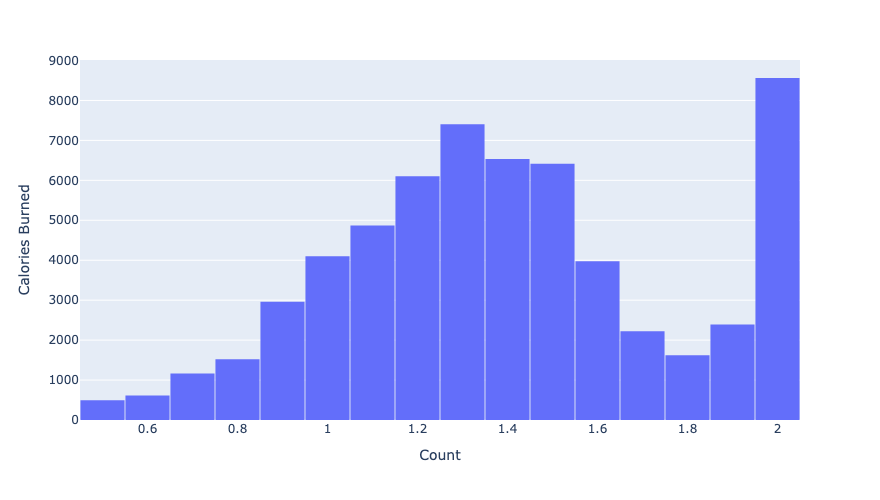

In [64]:
fig = px.histogram(df,
                 x='Session_Duration (hours)',
                 y= 'Age',
                 nbins=20,
                  )

fig.update_layout(bargap=0.02,
                  yaxis_title="Session_Duration (hours)",
                  xaxis_title="Count",
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

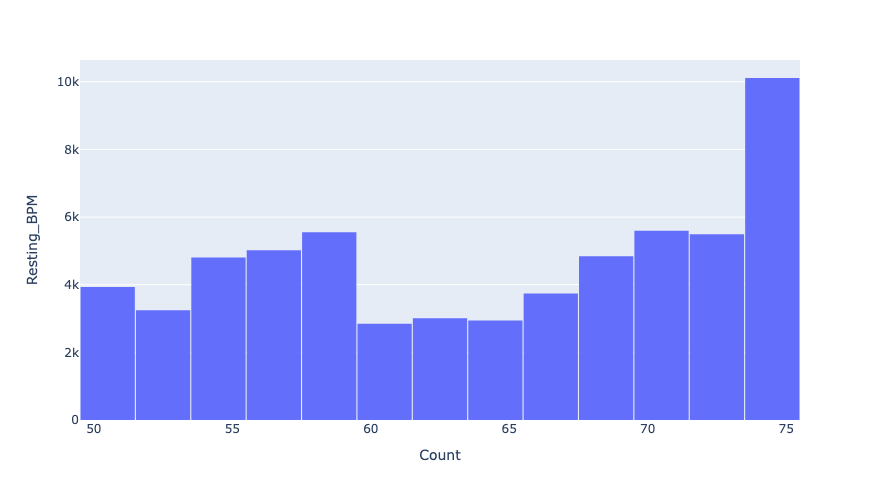

In [62]:
fig = px.histogram(df,
                 x='Resting_BPM',
                 y= 'Age',
                 nbins=13,
                  )

fig.update_layout(bargap=0.02,
                  yaxis_title="Resting_BPM",
                  xaxis_title="Count",
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

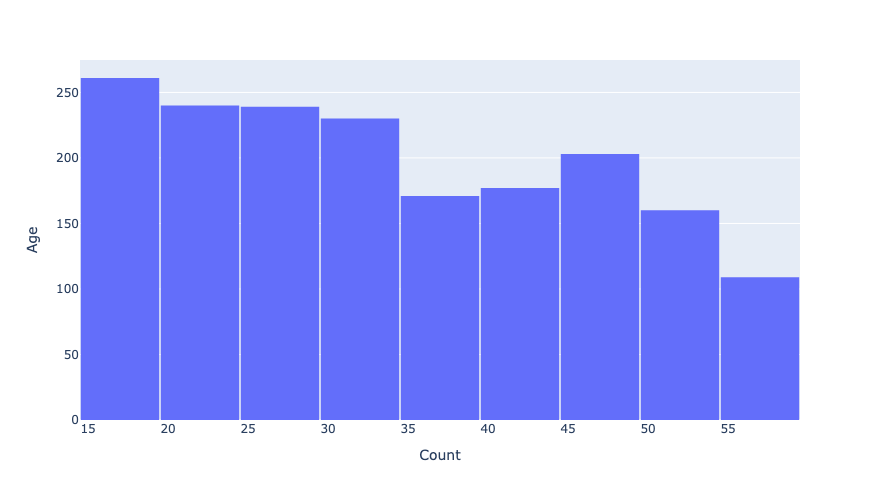

In [50]:
fig = px.histogram(df,
                 x='Age',
                 nbins=20,
                  )

fig.update_layout(bargap=0.02,
                  yaxis_title="Age",
                  xaxis_title="Count",
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

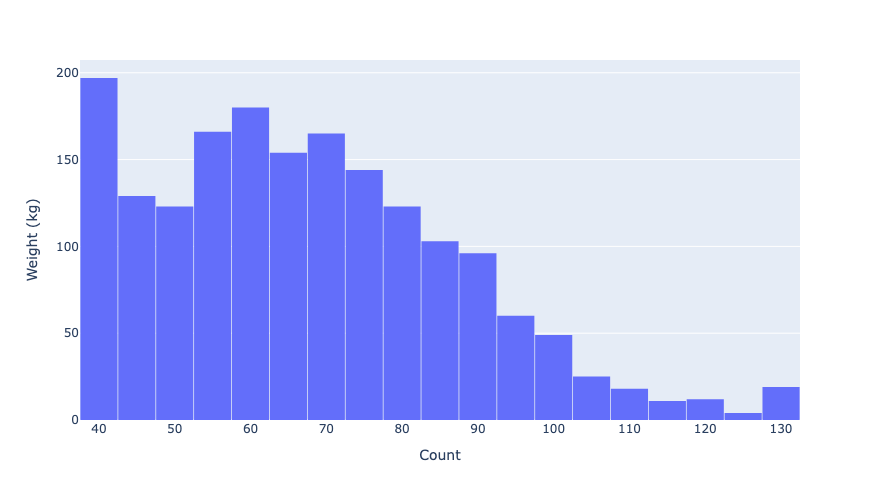

In [48]:
fig = px.histogram(df,
                 x='Weight (kg)',
                 #y= 'Age',
                 nbins=18,
                  )

fig.update_layout(bargap=0.02,
                  yaxis_title="Weight (kg)",
                  xaxis_title="Count",
                  autosize=False,
                  width=800,
                  height=500)

fig.show()